<a href="https://colab.research.google.com/github/KelseyNager/GenAI/blob/main/HW2/HW_2_Problem_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Comparing MLP and CNN Architectures on CIFAR-10 Dataset
### Kelsey Nager
### CSC 330 D01
### September 26th 2024

The purpose of this assignment is to compare the effectiveness of the MLP and CNN models in classifying images. We will observe the difference in model performance, accuracy, and training time.

## Data Preprocessing


In [41]:
import numpy as np
import matplotlib.pyplot as plt

from tensorflow import keras
from tensorflow.keras import layers, models, optimizers, utils, datasets
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, ReLU, BatchNormalization, Dropout


In [28]:
NUM_CLASSES = 10

In [29]:
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()

Normalizing Data

In [30]:
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

y_train = utils.to_categorical(y_train, NUM_CLASSES)
y_test = utils.to_categorical(y_test, NUM_CLASSES)


## MLP Model <a name="build"></a>

Declaring a function. Added layers using Flatten, Dense, and a dropout layer of 50% rate to prevent overfitting.

In [49]:
def create_mlp_model(input_shape, num_classes):
  input_layer = layers.Input((32, 32, 3))

  x = layers.Flatten()(input_layer)
  x = layers.Dense(200, activation="relu")(x)
  x = layers.Dense(150, activation="relu")(x)
  x = layers.Dropout(rate=0.5)(x)

  output_layer = layers.Dense(NUM_CLASSES, activation="softmax")(x)

  model = models.Model(input_layer, output_layer)
  return model

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 batch_normalization (Batch  (None, 30, 30, 32)        128       
 Normalization)                                                  
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 15, 15, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                      

### MLP Training <a name="train"></a>

Compiling the MLP model with adam optimizer. Here I used the categorical crossentropy loss function as opposed to the sparse categorical crossentropy function because I had one-hot encoded the labels during the preprocessing stage.

In [50]:
opt = optimizers.Adam(learning_rate=0.0005)
model.compile(
    loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"]
)

Training the MLP model using the fit method with a validation split of 20-80.

In [33]:
MLP = model.fit(x_train, y_train, batch_size=32, epochs=10, validation_split=.2, shuffle=True)

Epoch 1/10
1250/1250 [==============================] - 7s 5ms/step - loss: 2.0004 - accuracy: 0.2657 - val_loss: 1.8529 - val_accuracy: 0.3347
Epoch 2/10
1250/1250 [==============================] - 6s 5ms/step - loss: 1.8180 - accuracy: 0.3462 - val_loss: 1.7479 - val_accuracy: 0.3729
Epoch 3/10
1250/1250 [==============================] - 6s 5ms/step - loss: 1.7476 - accuracy: 0.3749 - val_loss: 1.7155 - val_accuracy: 0.3828
Epoch 4/10
1250/1250 [==============================] - 6s 5ms/step - loss: 1.6961 - accuracy: 0.3932 - val_loss: 1.6926 - val_accuracy: 0.3885
Epoch 5/10
1250/1250 [==============================] - 6s 5ms/step - loss: 1.6717 - accuracy: 0.4076 - val_loss: 1.6238 - val_accuracy: 0.4292
Epoch 6/10
1250/1250 [==============================] - 6s 5ms/step - loss: 1.6491 - accuracy: 0.4090 - val_loss: 1.6240 - val_accuracy: 0.4247
Epoch 7/10
1250/1250 [==============================] - 6s 5ms/step - loss: 1.6321 - accuracy: 0.4182 - val_loss: 1.5942 - val_accuracy:

### MLP Evaluation
#####Evaluating the MLP on the test set using the evaluate method

In [34]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 1.5736 - accuracy: 0.4428


[1.5735567808151245, 0.44279998540878296]

It is already evident from the loss of 1.57 and accuracy of .44 that this is not a highly complex and efficient model.

### MLP Plotting

Plotting the validation accuracy for the MLP.

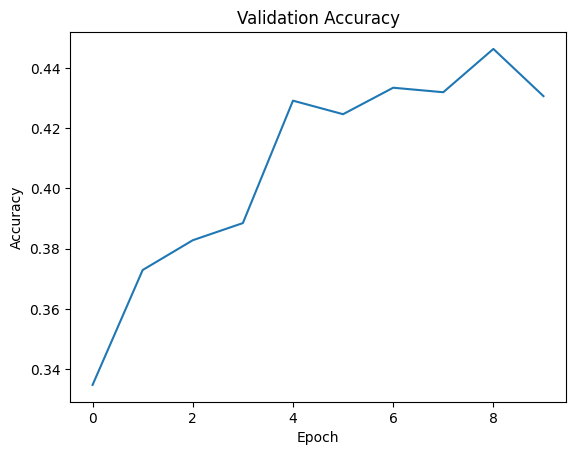

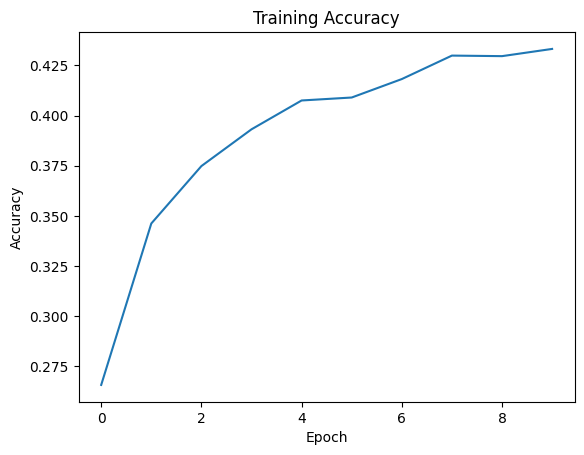

In [35]:
plt.plot(MLP.history['val_accuracy'])
plt.title('Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()

plt.plot(MLP.history['accuracy'])
plt.title('Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()

This plot better visualizes the accuracy. While the MLP model is learning and accuracies growing, they are overall small validation and training accuracies under the .5 point.

# CNN Model
###### Creating the CNN model using sequential and adding layers. I used strides of three to shrink the image and quicken the process. I used categorical crossentropy as the loss function because the labels are one-hot encoded during pre-processing.

In [42]:
input_shape = (32, 32, 3)
num_classes = 10

def create_cnn_model(input_shape, num_classes):
  model = keras.Sequential(
         [
            Conv2D(32, (3,3), activation='relu', input_shape=input_shape),
            BatchNormalization(),
            MaxPooling2D(pool_size=(2, 2)),
            Conv2D(64, (3,3), activation='relu'),
            MaxPooling2D(pool_size=(2, 2)),
            Flatten(),
            Dense(128, activation='relu'),
            Dropout(0.5),
            Dense(num_classes, activation='softmax')
         ]
  )
  opt = optimizers.Adam(learning_rate=0.0005)
  model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
  return model

model = create_cnn_model(input_shape, num_classes)



Epoch 1/10
1563/1563 [==============================] - 19s 11ms/step - loss: 1.6036 - accuracy: 0.4136 - val_loss: 1.4641 - val_accuracy: 0.4755
Epoch 2/10
1563/1563 [==============================] - 17s 11ms/step - loss: 1.2977 - accuracy: 0.5382 - val_loss: 1.3291 - val_accuracy: 0.5478
Epoch 3/10
1563/1563 [==============================] - 17s 11ms/step - loss: 1.1741 - accuracy: 0.5856 - val_loss: 1.0400 - val_accuracy: 0.6285
Epoch 4/10
1563/1563 [==============================] - 17s 11ms/step - loss: 1.0817 - accuracy: 0.6201 - val_loss: 1.0793 - val_accuracy: 0.6259
Epoch 5/10
1563/1563 [==============================] - 17s 11ms/step - loss: 1.0187 - accuracy: 0.6407 - val_loss: 1.0362 - val_accuracy: 0.6390
Epoch 6/10
1563/1563 [==============================] - 18s 11ms/step - loss: 0.9600 - accuracy: 0.6612 - val_loss: 0.9873 - val_accuracy: 0.6586
Epoch 7/10
1563/1563 [==============================] - 17s 11ms/step - loss: 0.9057 - accuracy: 0.6806 - val_loss: 0.9486 -

In [43]:
CNN = model.fit(
    x_train,
    y_train,
    batch_size=32,
    epochs=10,
    shuffle=True,
    validation_data=(x_test, y_test),
)

Epoch 1/10
1563/1563 [==============================] - 18s 11ms/step - loss: 0.7674 - accuracy: 0.7285 - val_loss: 0.9469 - val_accuracy: 0.6779
Epoch 2/10
1563/1563 [==============================] - 18s 11ms/step - loss: 0.7325 - accuracy: 0.7410 - val_loss: 0.9120 - val_accuracy: 0.6990
Epoch 3/10
1563/1563 [==============================] - 18s 11ms/step - loss: 0.7114 - accuracy: 0.7478 - val_loss: 0.9567 - val_accuracy: 0.6866
Epoch 4/10
1563/1563 [==============================] - 17s 11ms/step - loss: 0.6807 - accuracy: 0.7578 - val_loss: 0.9104 - val_accuracy: 0.7065
Epoch 5/10
1563/1563 [==============================] - 18s 11ms/step - loss: 0.6650 - accuracy: 0.7607 - val_loss: 0.8879 - val_accuracy: 0.7106
Epoch 6/10
1563/1563 [==============================] - 17s 11ms/step - loss: 0.6407 - accuracy: 0.7713 - val_loss: 1.0090 - val_accuracy: 0.6913
Epoch 7/10
1563/1563 [==============================] - 18s 11ms/step - loss: 0.6153 - accuracy: 0.7775 - val_loss: 0.9337 -

## CNN Evaluation

In [44]:
model.evaluate(x_test, y_test, batch_size=1000)

10/10 [==============================] - 1s 56ms/step - loss: 1.0077 - accuracy: 0.7045


[1.0077424049377441, 0.7045000195503235]

It is already evident by a lower loss of 1.01 and higher accuracy of .705 that the CNN model is a more effective model for classifying images than the MLP.

# Plotting CNN

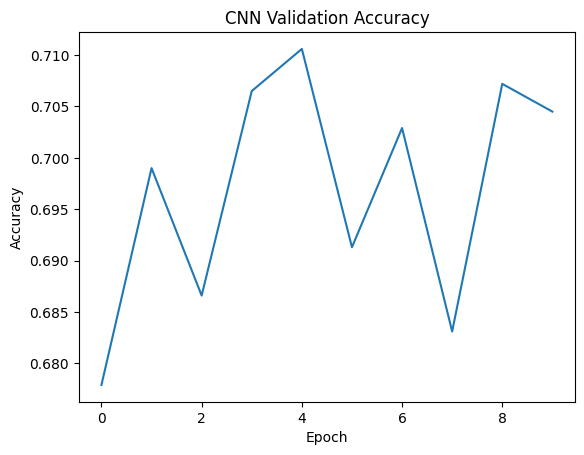

In [46]:
# Plot validation accuracy
plt.plot(CNN.history['val_accuracy'])
plt.title('CNN Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()

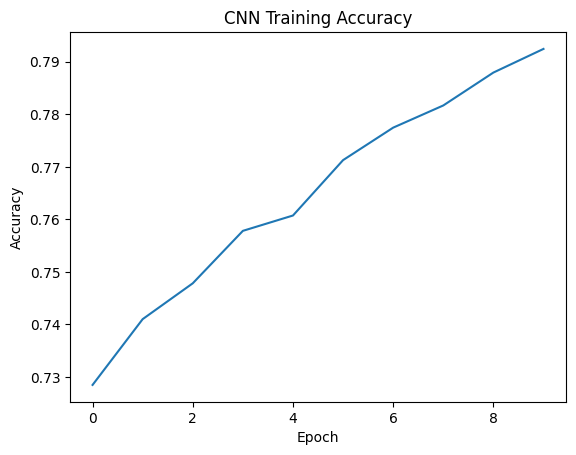

In [47]:
#Plot Training Accuracy
plt.plot(CNN.history['accuracy'])
plt.title('CNN Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()

These plots show that the CNN is able to learn over the epochs and therfore produce a steady increase in accuracy in training. However, we see variance in the validation accuracy. It is certainly higher than the validation accuracy of the MLP, but it more volatile. I believe that this may be due to the complexity of the model, despite the  dropout layer, it may still be experiencing overfitting.

In conclusion, the CNN is much more effective in classifying the images than the MLP. It gets much higher accuracies and lower losses. The drawback of this model is the training time, as it took several minutes longer than the MLP to train. This is not problematic in this case, but with more data, it could take hours to train.

The longer training time associated with CNNs are due to their model complexity. The CNN has the ability to detect high level features by applying filters to the kernels. This allows the model to detect edges and to better "see" an image in order to then classify it. This feature detection is done before continuing to the rest of the classification weighting process we observe in models like MLP.

The overfitting occurs when the model learns too much and becomes rigid in its classification instead of being able to flex to properly classify inputs. I used the dropout layer to mitigate overfitting. The dropout layer randomly sets weights to zero, so that the model does not have too rigid of parameters. The only sign of overfitting I observed was the variation in CNN validation accuracy as the number of epochs increased. Even then, the variation was within a .02 range and thus not terrible.